## TERMINOLOGIES
1. **Remaining Useful Life (RUL)-** it represents remaining life until the EOL. It is major research subject in battery health management to estimate degree of aging in battery. 
2. **Cycle Life-** the number of charge and discharge cycles that a battery can complete before losing performance.
3. **Time Constant Current-** is the time taken by the capacitor to be charged to about 63.2% of its full value through a resistor connected to it in series.


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/Users/abhishekjaiswal/Downloads/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [17]:
df = pd.read_csv("/Users/abhishekjaiswal/Downloads/Battery_RUL.csv")
df['RUL']

0        1112
1        1111
2        1110
3        1109
4        1107
         ... 
15059       4
15060       3
15061       2
15062       1
15063       0
Name: RUL, Length: 15064, dtype: int64

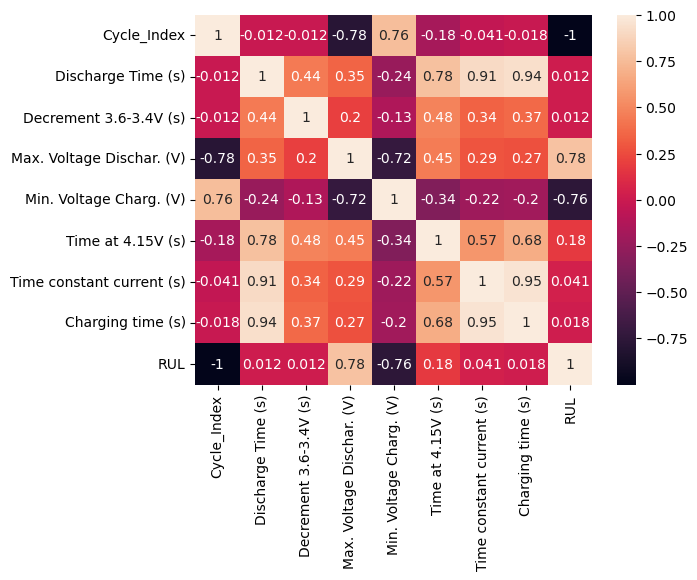

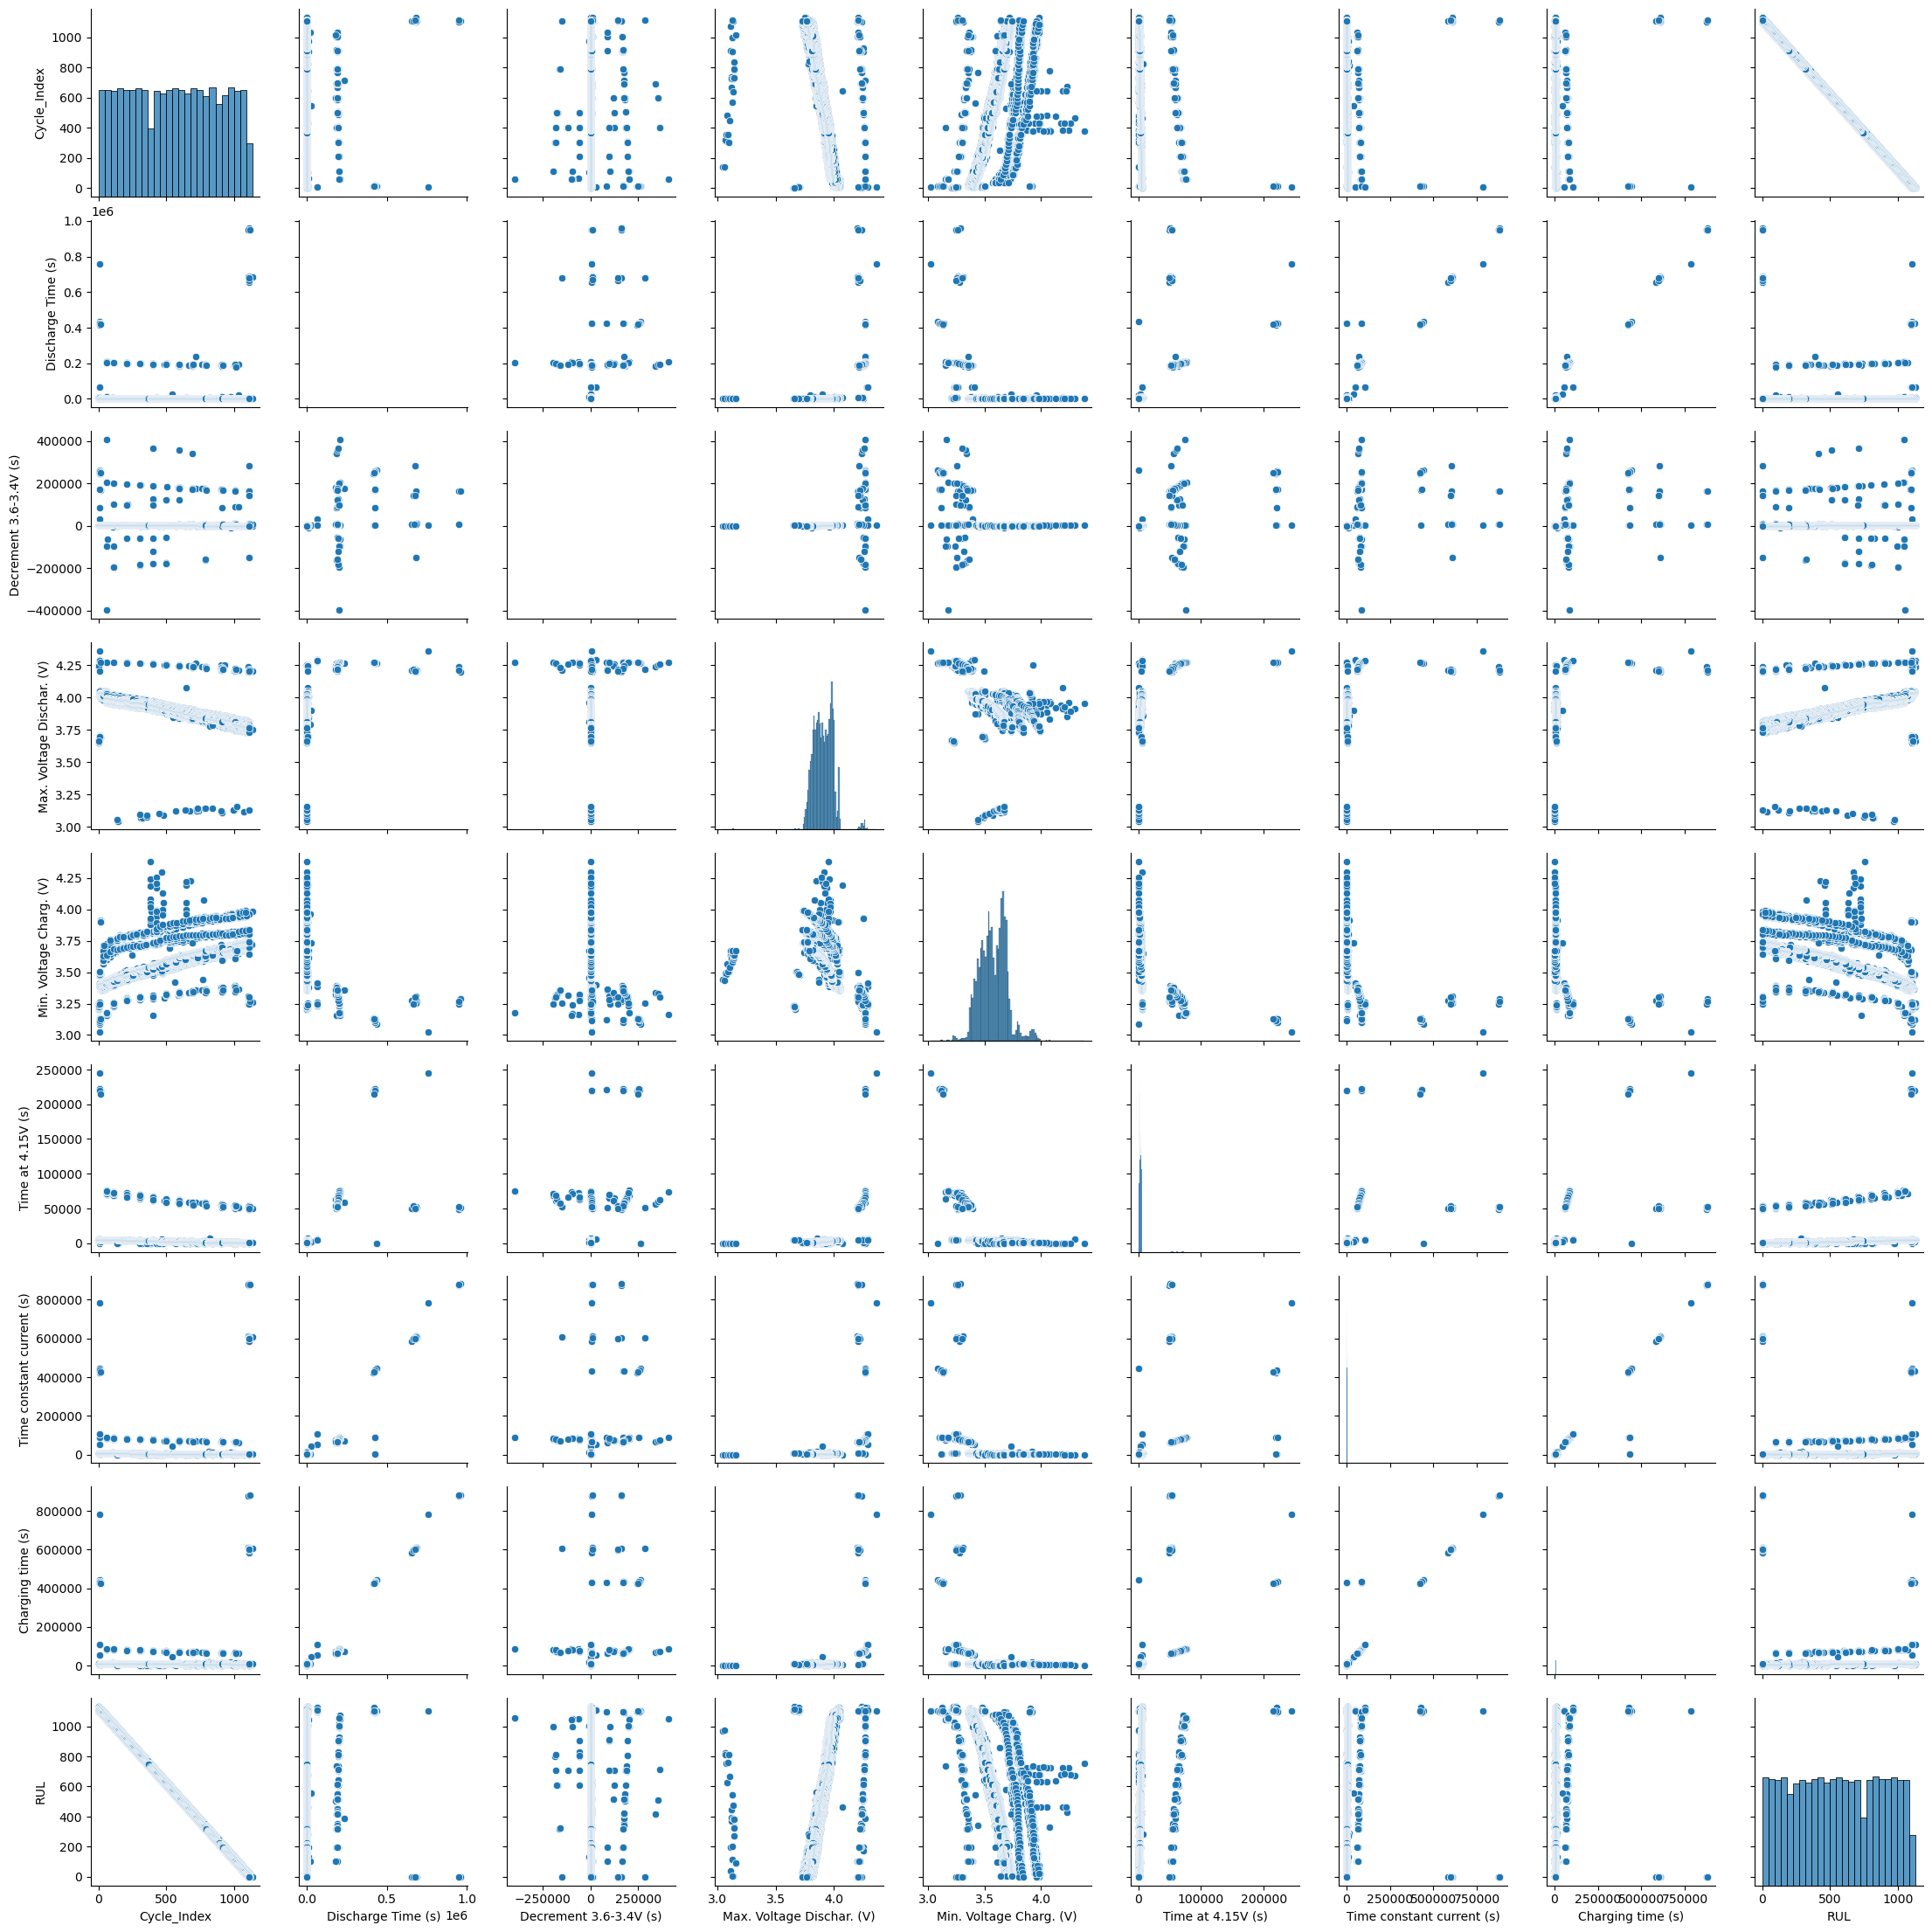

In [18]:
# Find - correlation between various  parameters
corr = df.corr()

# Draw - heatmap & pairplots
sns.heatmap(corr, annot=True)
sns.pairplot(df)

In [19]:
# Battery ID column creation 
df['Battery ID']= 0 
b=[] 
j=1
for i in df['RUL']: 
    b.append(j) 
    if i == 0: 
        j+=1
        continue
df['Battery ID'] = b 
df.columns.tolist()

['Cycle_Index',
 'Discharge Time (s)',
 'Decrement 3.6-3.4V (s)',
 'Max. Voltage Dischar. (V)',
 'Min. Voltage Charg. (V)',
 'Time at 4.15V (s)',
 'Time constant current (s)',
 'Charging time (s)',
 'RUL',
 'Battery ID']

In [20]:
# Split - dataset into train and test according to battery ID 
# 9 batteries for training and 5 for testing
train_battery_ids = []
test_battery_ids = []
battery_ids = df['Battery ID'].unique()
for i in battery_ids:
    if i<=8:
        train_battery_ids.append(i)
    else:
        test_battery_ids.append(i)
train_data = df[df['Battery ID'].isin(train_battery_ids)]
test_data = df[df['Battery ID'].isin(test_battery_ids)]
train_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Battery ID
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112,1
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111,1
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110,1
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109,1
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107,1
...,...,...,...,...,...,...,...,...,...,...
8624,1101.0,948.00,258.000000,3.812,3.702,1326.813000,1952.31,7172.31,4,8
8625,1102.0,948.00,255.657143,3.810,3.702,1317.875000,1916.38,7136.38,3,8
8626,1103.0,936.00,255.428571,3.810,3.704,1299.170143,1916.31,7172.31,2,8
8627,1104.0,948.00,255.016000,3.803,3.957,945.000000,1687.00,7987.00,1,8


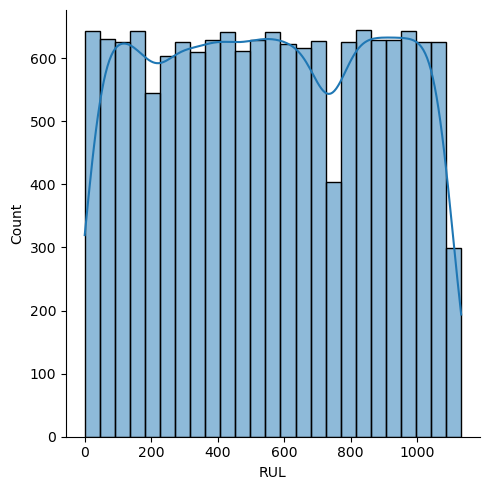

In [21]:
# Check - normal distribution of RUL
sns.displot(df['RUL'], kde=True)

In [22]:
# Drop - Cycle Index and Battery ID from the dataset as they don't add value
train_data = train_data.drop('Cycle_Index', axis=1)
test_data = test_data.drop('Cycle_Index', axis=1)
train_data = train_data.drop('Battery ID', axis=1)
test_data = test_data.drop('Battery ID', axis=1)
train_data

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...
8624,948.00,258.000000,3.812,3.702,1326.813000,1952.31,7172.31,4
8625,948.00,255.657143,3.810,3.702,1317.875000,1916.38,7136.38,3
8626,936.00,255.428571,3.810,3.704,1299.170143,1916.31,7172.31,2
8627,948.00,255.016000,3.803,3.957,945.000000,1687.00,7987.00,1


In [23]:

X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]
X_test

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
8629,2565.31,1186.496500,3.664,3.221,5439.007,6740.99,10999.07
8630,7333.44,1196.992000,4.240,3.227,5480.992,6740.99,10683.97
8631,7302.50,1133.984000,4.242,3.232,5460.000,6720.00,10579.10
8632,7300.03,1099.008000,4.244,3.234,5467.004,6720.00,10483.52
8633,64835.52,1116.496000,4.288,3.239,5467.008,107695.78,107695.78
...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62


In [24]:
# Use - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [25]:
y_pred = regressor.predict(X_test)
y_pred

array([1107.32, 1107.21, 1105.11, ...,   20.91,   12.38,    0.  ])

[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Actual vs Predicted RUL')]

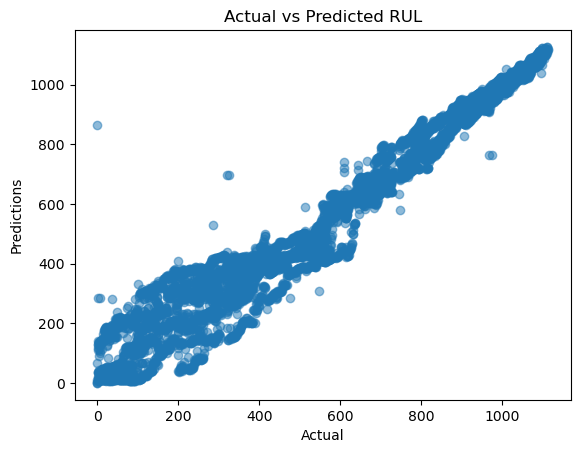

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

RFR_mseloss = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

RFR_r2

0.9536039033063113

0.9422352769713493

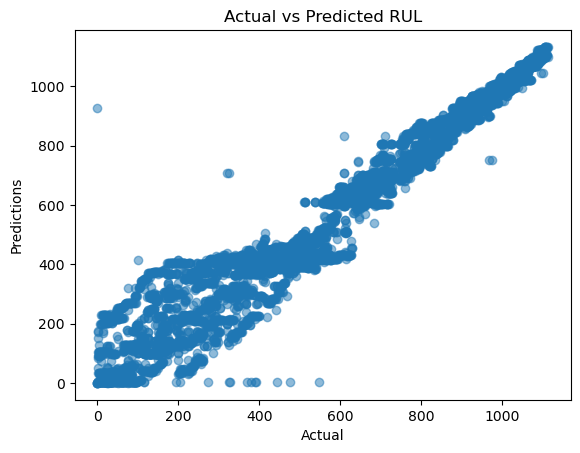

In [28]:
# Use - Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

ax.set(xlabel='Actual', 
        ylabel='Predictions',
         title='Actual vs Predicted RUL')
RFR_mseloss = mean_squared_error(y_test, y_pred)
RFR_r2 = r2_score(y_test, y_pred)

RFR_r2